In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve, auc,classification_report
import numpy as pn
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
path = 'C:/Users/User/Desktop/MIT/CART & Random Forest/data/'
filename = 'ClaimsData.csv'

In [3]:
claims = pd.read_csv(path+filename)
claims.head()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458005 entries, 0 to 458004
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age                458005 non-null  int64
 1   alzheimers         458005 non-null  int64
 2   arthritis          458005 non-null  int64
 3   cancer             458005 non-null  int64
 4   copd               458005 non-null  int64
 5   depression         458005 non-null  int64
 6   diabetes           458005 non-null  int64
 7   heart.failure      458005 non-null  int64
 8   ihd                458005 non-null  int64
 9   kidney             458005 non-null  int64
 10  osteoporosis       458005 non-null  int64
 11  stroke             458005 non-null  int64
 12  reimbursement2008  458005 non-null  int64
 13  bucket2008         458005 non-null  int64
 14  reimbursement2009  458005 non-null  int64
 15  bucket2009         458005 non-null  int64
dtypes: int64(16)
memory usage: 55.9 MB


building a decission tree for cost classification

In [5]:
y = claims['bucket2009']
x = claims.drop(columns=['bucket2009'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [8]:
y_pred = model.predict(x_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[92083,     0,     0,     0,     0],
       [    0, 26128,     0,     0,     0],
       [    0,     0, 12492,     0,     0],
       [    0,     0,     0,  5954,     0],
       [    0,     0,     0,     0,   745]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     92083
           2       1.00      1.00      1.00     26128
           3       1.00      1.00      1.00     12492
           4       1.00      1.00      1.00      5954
           5       1.00      1.00      1.00       745

    accuracy                           1.00    137402
   macro avg       1.00      1.00      1.00    137402
weighted avg       1.00      1.00      1.00    137402



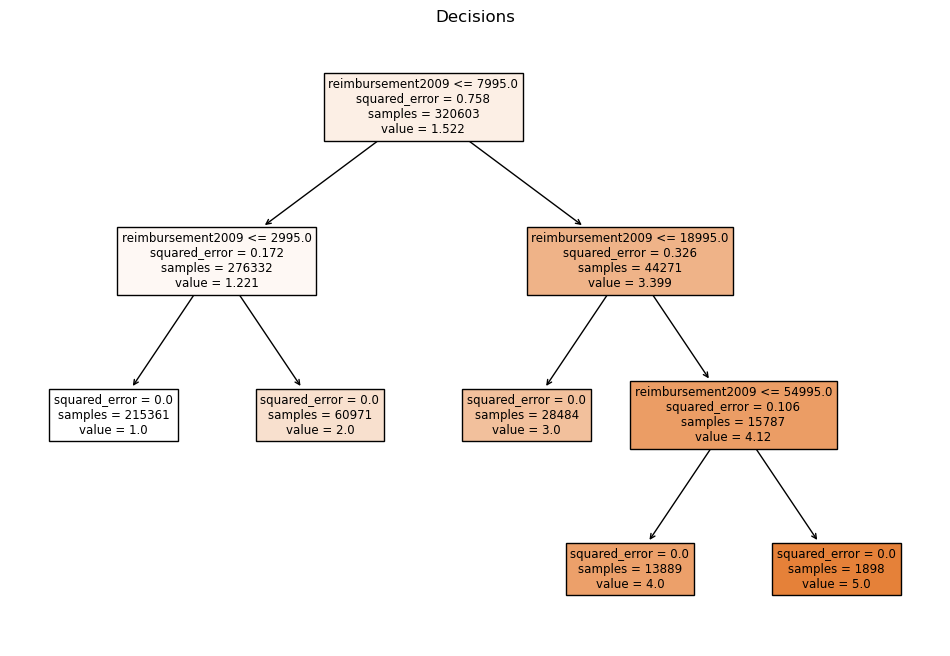

In [14]:
plt.figure(figsize=(12, 8))  # Set figure size
tree.plot_tree(model, feature_names=x_train.columns, class_names= str(y_train), filled=True)
plt.title("Decisions")
plt.show()